## uzimanje podataka

In [32]:
import pandas as pd

allData = pd.read_csv("all.csv") 

## Opis podataka

In [33]:
allData.describe()

Slanost  Temp_zraka   Temp_vode  Crijevni_enterokoki  \
count  564.000000  564.000000  564.000000           564.000000   
mean    33.135443   24.267199   21.470035            65.764184   
std      5.023127    4.065049    2.983806           192.188895   
min     13.090000   11.000000   14.100000             0.000000   
25%     31.200000   22.000000   19.175000             4.000000   
50%     35.105000   24.000000   21.500000            18.000000   
75%     36.530000   27.200000   23.325000            53.250000   
max     39.550000   37.000000   28.000000          3000.000000   

       Escherichia_coli  Suncevo_zracenje_DHMZ GHI    Padaline  KPad0h-24h  \
count        564.000000                 564.000000  564.000000  564.000000   
mean         101.845745                 544.604415    0.023493    1.742553   
std          302.964030                 204.771989    0.204962    6.499878   
min            0.000000                   0.000000    0.000000    0.000000   
25%            3.000000                 422.960000    0.000000    0.000000   
50%           15.500000                 572.340000    0.000000    0.000000   
75%           84.250000                 681.840000    0.000000    0.250000   
max         3500.000000                 925.000000    2.150000   42.000000   

       KPad25h-48h  KPad49h-72h  ...  RelativeHumidity  SurfacePressure  \
count   564.000000   564.000000  ...        564.000000       564.000000   
mean      1.815426     4.225355  ...         59.394095       974.873375   
std       6.088538    10.821885  ...         11.444647         5.557310   
min       0.000000     0.000000  ...         35.000000       960.399267   
25%       0.000000     0.000000  ...         51.020700       972.384761   
50%       0.000000     0.000000  ...         57.334147       975.481344   
75%       0.500000     1.450000  ...         66.558964       978.545966   
max      42.000000    63.100000  ...         92.350444       987.730409   

       WindDirection10m  WindSpeed10m      Zenith   KPad3d-6d  KPad6d-10d  \
count        564.000000    564.000000  564.000000  564.000000  564.000000   
mean         134.168177      2.522708   37.913482   12.210284   10.956738   
std           92.819362      1.330104   10.669776   26.631404   17.161566   
min          -38.907966      0.217576   22.564756    0.000000    0.000000   
25%           46.530664      1.686817   26.491713    0.000000    0.000000   
50%          111.968946      2.466385   38.873764    1.100000    2.800000   
75%          215.216049      3.263654   44.794417   10.400000   13.000000   
max          378.044071      6.636055   64.147145  207.900000  134.000000   

       KPad10d-17d  Kpad17d-21d  Padaline_1d_poslije   
count   564.000000   564.000000            564.000000  
mean     22.241844    59.305851              1.093440  
std      27.986444    43.625493              3.305049  
min       0.000000     0.200000              0.000000  
25%       1.100000    27.800000              0.000000  
50%       7.750000    58.200000              0.000000  
75%      34.800000    83.000000              0.200000  
max     134.500000   231.100000             20.200000  

[8 rows x 36 columns]

### Histogrami podataka

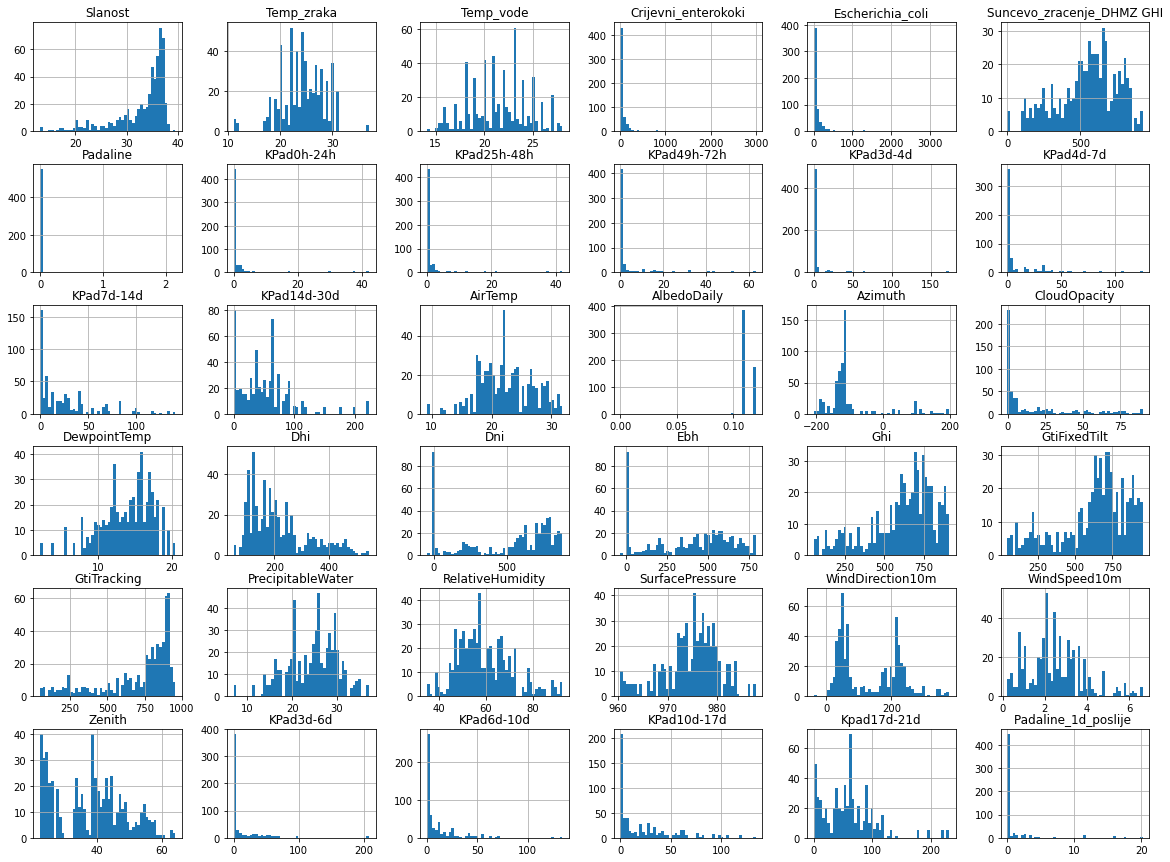

In [34]:
%matplotlib inline
import matplotlib.pyplot as plt
allData.hist(bins = 50, figsize = (20, 15))
plt.show()

## Izrada test seta

In [35]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(allData, test_size=0.20, random_state=42)

## Traženje korelacije

In [36]:
corr_matrix_data = train_data.corr()

corr_matrix_data['Escherichia_coli'].sort_values(ascending = False)

Escherichia_coli             1.000000
Crijevni_enterokoki          0.767447
CloudOpacity                 0.323876
KPad14d-30d                  0.314852
KPad0h-24h                   0.309892
Kpad17d-21d                  0.307988
RelativeHumidity             0.298106
KPad25h-48h                  0.216624
Padaline_1d_poslije          0.147452
WindDirection10m             0.143013
Padaline                     0.115451
KPad7d-14d                   0.105644
KPad10d-17d                  0.096746
Zenith                       0.095653
DewpointTemp                 0.087973
PrecipitableWater            0.081758
SurfacePressure              0.076914
WindSpeed10m                 0.057725
KPad3d-4d                    0.043346
KPad3d-6d                    0.040734
KPad6d-10d                   0.012739
KPad4d-7d                    0.007465
KPad49h-72h                 -0.004841
Azimuth                     -0.021491
Dhi                         -0.091187
AirTemp                     -0.108893
Slanost     

Po ovome možemo vidjeti da najveću pozitivnu linearnu korelaciju imaju jedne bakterije na druge.
Odmah ispod njih je u ovom slučaju naoblaka i kumulativne padaline od 14d-30d, 0h-24h, 17d-21d itd.
Najveću negativnu linearnu korelaciju imaju GtiTracking, Ghi, GtiFixedTilt, Suncevo_zracenje_DHMZ GHI

In [37]:
corr_matrix_data['Crijevni_enterokoki'].sort_values(ascending = False)

Crijevni_enterokoki          1.000000
Escherichia_coli             0.767447
KPad0h-24h                   0.358939
Kpad17d-21d                  0.218730
KPad14d-30d                  0.211699
RelativeHumidity             0.203981
CloudOpacity                 0.196939
WindDirection10m             0.161567
PrecipitableWater            0.135973
Padaline_1d_poslije          0.127842
DewpointTemp                 0.127272
KPad25h-48h                  0.119298
Padaline                     0.106098
SurfacePressure              0.078649
KPad10d-17d                  0.036283
KPad7d-14d                   0.035240
WindSpeed10m                 0.032969
KPad3d-6d                   -0.001353
KPad4d-7d                   -0.007603
KPad3d-4d                   -0.008152
AirTemp                     -0.012290
Zenith                      -0.020373
Azimuth                     -0.023488
KPad49h-72h                 -0.024451
Dhi                         -0.030212
KPad6d-10d                  -0.037360
Temp_zraka  

Ovdje se također može vidjeti da najveću linearnu korelaciju imaju druge bakterije i iste kumulativne padaline kao kod Escherichie coli, što je i bilo za očekivati, no ono što je drugačije je da AlbedoDaily ima veću negativnu linearnu korelaciju nego što je to bio slučaj kod E. coli

Zaključak bi bio da u ovim mjerenjima bakterije nemaju jaku linearnu korelaciju s ovim varijablama.

### Provjeravanje korelacije pomoću scatter_matrix()

Kako bi ljepše vidjeli da li možda postoji neka nelinearna korelacija između bakterija i ostalih parametara korist se scatter_matrix() funkcija.

array([[<AxesSubplot:xlabel='Slanost', ylabel='Slanost'>,
        <AxesSubplot:xlabel='Temp_zraka', ylabel='Slanost'>,
        <AxesSubplot:xlabel='Temp_vode', ylabel='Slanost'>, ...,
        <AxesSubplot:xlabel='KPad6d-10d', ylabel='Slanost'>,
        <AxesSubplot:xlabel='KPad10d-17d', ylabel='Slanost'>,
        <AxesSubplot:xlabel='Kpad17d-21d', ylabel='Slanost'>],
       [<AxesSubplot:xlabel='Slanost', ylabel='Temp_zraka'>,
        <AxesSubplot:xlabel='Temp_zraka', ylabel='Temp_zraka'>,
        <AxesSubplot:xlabel='Temp_vode', ylabel='Temp_zraka'>, ...,
        <AxesSubplot:xlabel='KPad6d-10d', ylabel='Temp_zraka'>,
        <AxesSubplot:xlabel='KPad10d-17d', ylabel='Temp_zraka'>,
        <AxesSubplot:xlabel='Kpad17d-21d', ylabel='Temp_zraka'>],
       [<AxesSubplot:xlabel='Slanost', ylabel='Temp_vode'>,
        <AxesSubplot:xlabel='Temp_zraka', ylabel='Temp_vode'>,
        <AxesSubplot:xlabel='Temp_vode', ylabel='Temp_vode'>, ...,
        <AxesSubplot:xlabel='KPad6d-10d', ylabel='Te

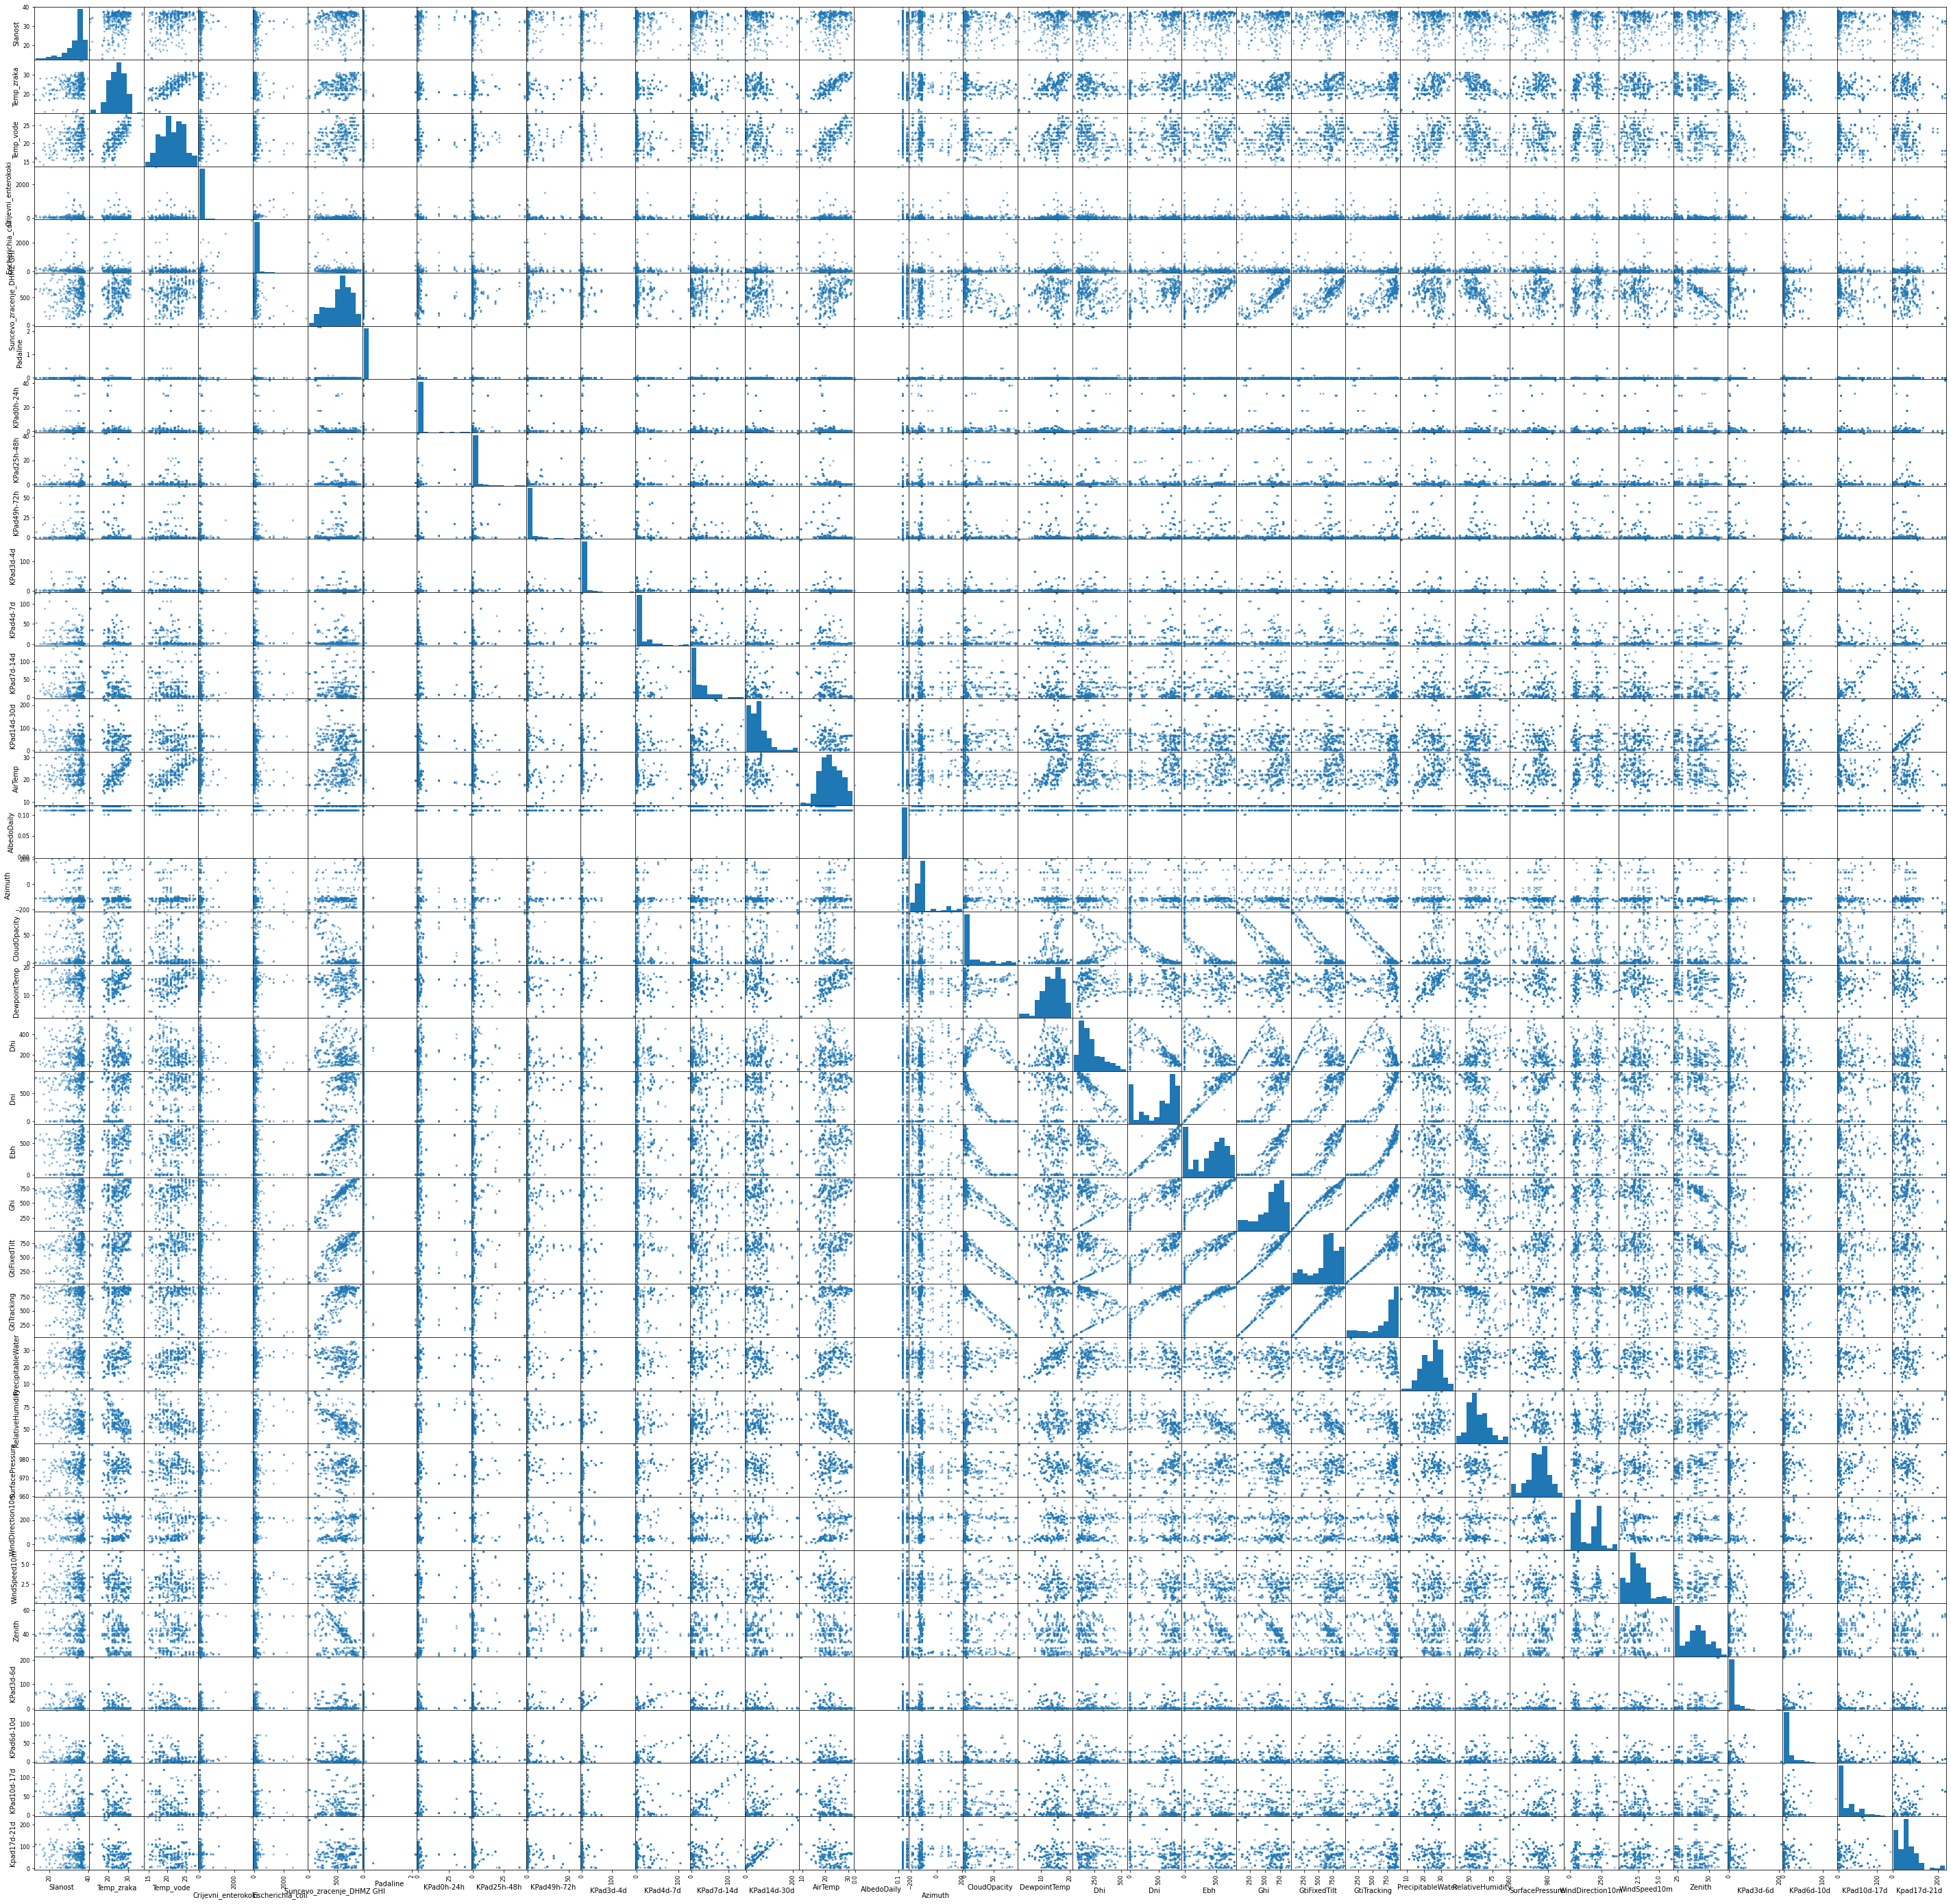

In [83]:
from pandas.plotting import scatter_matrix

stupci = ['Slanost', 'Temp_zraka', 'Temp_vode', 'Crijevni_enterokoki', 'Escherichia_coli', 'Suncevo_zracenje_DHMZ GHI', 'Padaline', 'KPad0h-24h', 'KPad25h-48h', 'KPad49h-72h', 'KPad3d-4d', 'KPad4d-7d', 'KPad7d-14d', 'KPad14d-30d', 'AirTemp', 'AlbedoDaily', 'Azimuth', 'CloudOpacity', 'DewpointTemp', 'Dhi', 'Dni', 'Ebh', 'Ghi', 'GtiFixedTilt', 'GtiTracking', 'PrecipitableWater', 'RelativeHumidity', 'SurfacePressure', 'WindDirection10m', 'WindSpeed10m', 'Zenith','KPad3d-6d' ,'KPad6d-10d', 'KPad10d-17d', 'Kpad17d-21d']
scatter_matrix(train_data[stupci], figsize = (50, 50))

Ovdje u matrici se vidi kako bakterije(4,5 stupac/redak) nemaju neke vidljive korelacije s ostalim varijablama.

## Pripremanje podataka za treniranje

In [47]:
za_trening = train_data.drop('Escherichia_coli', axis = 1).drop('Crijevni_enterokoki', axis = 1)
tocni_odgovori_E_Coli = train_data['Escherichia_coli'].copy()
tocni_odgovori_Enterokoki = train_data['Crijevni_enterokoki'].copy()

## Skaliranje podataka

In [77]:
from sklearn.preprocessing import MinMaxScaler

def transformiraj(data):
    trans = MinMaxScaler()
    return trans.fit_transform(data)

pripremljeno_za_trening = transformiraj(za_trening)

## Izrada modela i evaluacija trening seta

### Općenito modeli

In [85]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
import numpy as np

def models(trening, tocni_odgovori):
    lin_reg = LinearRegression()
    lin_reg.fit(trening, tocni_odgovori)

    tree_reg = DecisionTreeRegressor()
    tree_reg.fit(trening, tocni_odgovori)

    forest_reg = RandomForestRegressor()
    forest_reg.fit(trening, tocni_odgovori)

    def display_scores(scores):
        print('Scores: ', scores)
        print('Mean: ', scores.mean())
        print('Standard deviation: ', scores.std())

    print('\nLinearRegression:')
    scores = cross_val_score(lin_reg, trening, tocni_odgovori, scoring = 'neg_mean_squared_error', cv =10)
    lin_rmse_scores = np.sqrt(-scores)
    display_scores(lin_rmse_scores)

    print('\nDecisionTreeRegressor:')
    scores = cross_val_score(tree_reg, trening, tocni_odgovori, scoring = 'neg_mean_squared_error', cv =10)
    tree_rmse_scores = np.sqrt(-scores)
    display_scores(tree_rmse_scores)

    print('\nRandomForestRegressor:')
    scores = cross_val_score(forest_reg, trening, tocni_odgovori, scoring = 'neg_mean_squared_error', cv =10)
    forest_rmse_scores = np.sqrt(-scores)
    display_scores(forest_rmse_scores)
    
    return lin_reg, tree_reg, forest_reg

### Modeli za E_Coli

In [87]:
lin_reg_E_Coli, tree_reg_E_Coli, forest_reg_E_Coli = models(pripremljeno_za_trening, tocni_odgovori_E_Coli)


LinearRegression:
Scores:  [365.89931159 258.45492351 125.11329173 580.84866318 110.01797636
 222.30150242 268.15787975 250.21066041 132.82629287 245.72260249]
Mean:  255.95531043111092
Standard deviation:  131.39517008855103

DecisionTreeRegressor:
Scores:  [346.5218796  173.22990504  85.40218576 462.78812047  86.36691753
 555.45656896 175.09489491 101.82097579 156.76259474 244.14526641]
Mean:  238.7589309220492
Standard deviation:  155.78591716546697

RandomForestRegressor:
Scores:  [374.82515756 324.50818032  59.23349724 499.38883402  69.62125233
 303.01080792 169.08797396 203.16399836  98.16341061 195.2854908 ]
Mean:  229.6288603124605
Standard deviation:  136.27348878373718


Da li može random forest bolje određivati ako pokušamo napraviti pomoću randomized searcha

In [93]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

def random_search(trening, tocni_odgovori):
    param_distribs = {
            'n_estimators': randint(low=1, high=200),
            'max_features': randint(low=1, high=35),
        }

    forest_reg = RandomForestRegressor(random_state=42)
    rnd_search = RandomizedSearchCV(forest_reg, param_distributions=param_distribs,
                                    n_iter=50, cv=5, scoring='neg_mean_squared_error', random_state=42)
    rnd_search.fit(trening, tocni_odgovori)
    return rnd_search
    
    
# cvres = rnd_search.cv_results_
# for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
#     print(np.sqrt(-mean_score), params)

In [94]:
rnd_search_E_Coli = random_search(pripremljeno_za_trening, tocni_odgovori_E_Coli).best_estimator_

scores = cross_val_score(rnd_search_E_Coli, pripremljeno_za_trening, tocni_odgovori_E_Coli, scoring = 'neg_mean_squared_error', cv =10)
rnd_search_rmse_scores = np.sqrt(-scores)
display_scores(rnd_search_rmse_scores)

Scores:  [392.44444057 295.65525747  53.95948103 494.08973793  67.62638795
 287.64392577 171.44655175 203.48734213  91.41279036 173.07603503]
Mean:  223.08419499848293
Standard deviation:  136.82849534340332


Čini se kako je random search polučio malo bolje rezultate tako da ćemo njega koristiti za kranji test.

### Modeli za Enterokoke

In [88]:
lin_reg_Enterokoki, tree_reg_Enterokoki, forest_reg_Enterokoki = models(pripremljeno_za_trening, tocni_odgovori_Enterokoki)


LinearRegression:
Scores:  [183.90339244 123.52737494  67.27649679 466.31884102 148.74806994
 118.88942626 184.8535161  158.64710719 185.26143495 179.14175966]
Mean:  181.65674192932744
Standard deviation:  101.52887278625352

DecisionTreeRegressor:
Scores:  [426.27935319 156.13654992 100.04210225 493.613434    57.50014493
 225.54590565  74.20601952 398.34541125 116.46325124 171.06814756]
Mean:  221.92003195151216
Standard deviation:  151.1493202207039

RandomForestRegressor:
Scores:  [215.94668342  99.74379097  36.14870657 447.81989042  69.96813657
 155.4539535  100.53547329 231.70338938 102.88993664 116.29340861]
Mean:  157.6503369371856
Standard deviation:  112.63245517106681


Također ćemo isprobati random search.

In [95]:
rnd_search_Enterokoki = random_search(pripremljeno_za_trening, tocni_odgovori_Enterokoki).best_estimator_

scores = cross_val_score(rnd_search_Enterokoki, pripremljeno_za_trening, tocni_odgovori_Enterokoki, scoring = 'neg_mean_squared_error', cv =10)
rnd_search_rmse_scores = np.sqrt(-scores)
display_scores(rnd_search_rmse_scores)

Scores:  [173.243375    79.62541524  41.55595268 452.24496654  83.4974637
  65.61661092  97.38498791 256.95671915 116.48266985 107.45700912]
Mean:  147.4065170122645
Standard deviation:  117.14189974977462


I također je random search polučio malo bolje rezultate za Enterokoke

## Provjera na testnom modelu

In [99]:
from sklearn.metrics import mean_squared_error

X_test = test_data.drop('Escherichia_coli', axis = 1).drop('Crijevni_enterokoki', axis = 1)
y_test_E_Coli = test_data['Escherichia_coli'].copy()
y_test_Enterokoki = test_data['Crijevni_enterokoki'].copy()

final_model_E_Coli = rnd_search_E_Coli
final_model_Enterokoki = rnd_search_Enterokoki

X_test_prepared = transformiraj(X_test)
final_predictions_E_Coli = final_model_E_Coli.predict(X_test_prepared)

final_mse_E_Coli = mean_squared_error(y_test_E_Coli, final_predictions_E_Coli)
final_rmse_E_Coli = np.sqrt(final_mse_E_Coli)

X_test_prepared = transformiraj(X_test)
final_predictions_Enterokoki = final_model_Enterokoki.predict(X_test_prepared)

final_mse_Enterokoki = mean_squared_error(y_test_Enterokoki, final_predictions_Enterokoki)
final_rmse_Enterokoki = np.sqrt(final_mse_Enterokoki)

print('rmse za E.Coli: ', final_rmse_E_Coli)
print('rmse za Eenterokoke: ', final_rmse_Enterokoki)

rmse za E.Coli:  319.60423362458806
rmse za Eenterokoke:  161.52941012975276


## Spremanje modela

In [100]:
from joblib import dump
dump(final_model_E_Coli, 'E_Coli_model.joblib')
dump(final_model_Enterokoki, 'Enterokoki_model.joblib')

['Enterokoki_model.joblib']